In [ ]:
# make second table of all blast hits to s288c-orfs for meru

In [1]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
import re
import numpy as np
import seaborn as sns

In [ ]:
# cat *.tsv > all.tsv

In [3]:
samples = ['MSY24','MSY25','MSY26','MSY27','MSY28','MSY29','MSY30','MSY31','MSY32','MSY33','MSY34','MSY35','MSY36','MSY37','MSY38','MSY39']
blast_cols=['header','s288c_hit','percent_id','length','mismatch','gapopen','qstart','qend','tstart','tend','evalue','bitscore']


In [4]:
for i, sample in enumerate(samples):
    df = pd.read_csv(f'../data/blastp_s288c_orf/{sample}.tsv', sep='\t', names=blast_cols)
    df['s288c_hit'] = df.s288c_hit.str[4:]
    df['strain'] = sample
    if i == 0:
        full_df = df[df_cols]
    else:
        full_df = full_df.append(df[df_cols])

NameError: name 'df_cols' is not defined

In [19]:
# now parse down the full_df
df = full_df
df.head()

,strain,query,s288c_hit,percent_id
0,MSY24,lcl|ORF1_MSY24_chrIV:1281:1769,ORF571_s288c_chrXII:6479:6967,99.383
1,MSY24,lcl|ORF1_MSY24_chrIV:1281:1769,ORF567_s288c_chrXII:836:1324,99.383
2,MSY24,lcl|ORF1_MSY24_chrIV:1281:1769,ORF77_s288c_chrVI:46:534,99.383
3,MSY24,lcl|ORF1_MSY24_chrIV:1281:1769,ORF194_s288c_chrXIV:727:1215,98.765
4,MSY24,lcl|ORF1_MSY24_chrIV:1281:1769,ORF276_s288c_chrXIII:820:1308,98.765


In [ ]:
select_cols = ['strain','header','s288c-orf_hit','percent_id','length', 'evalue']
df = df[select_cols]

In [21]:
cols = ['strain','header','s288c_hit','percent_id']
df.columns = cols

In [23]:
df['start'] = df.header.str.split(':').str[1]
df['end'] = df.header.str.split(':').str[2].str.split(' ').str[0]
df['orf'] = df.header.str.split(r"_").str[0].str[4:]
df['name'] = df['strain'] + "_" + df['orf']
df['chr'] = df.header.str.split('_').str[2].str.split(':').str[0]
df['strand'] = np.where(df.start < df.end, '+','-')
df['unique_name'] = df.name + "_" + df.chr

In [52]:
# export df
cols = ['name','chr','start','end','strand','s288c_hit','percent_id']
df[cols].to_csv('../data/blastp_ref/orf-hits-to-s288c.csv', index=False)

In [ ]:
# explore max percent_id

In [54]:
df.groupby('unique_name').percent_id.max().max()

100.0

In [53]:
df.groupby('unique_name').percent_id.max().min()

8.197000000000001

In [45]:
df.groupby('unique_name').percent_id.max().shape

(297557,)

In [46]:
df.unique_name.nunique()

297557

In [48]:
df.shape

(3019407, 11)

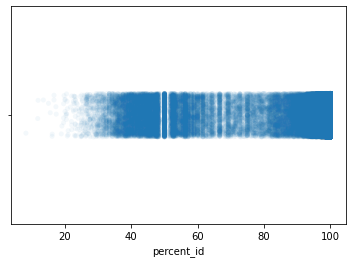

In [51]:
grid = sns.stripplot(x=df.groupby('unique_name').percent_id.max(), alpha=0.05)

In [55]:
(df.groupby('unique_name').percent_id.max() < 30).shape

(297557,)